# Import packages

In [1]:
import pandas as pd
import ml_help
from sklearn.model_selection import train_test_split
plot_label="Volume"

# Load data

In [2]:
df = pd.read_csv("./data/gardiner_count_weather_incidents.csv.zip")
df

,volume_15min,number_of_lanes,dist_from_mid_point,magnitudeOfDelay,length,delay,visibility,temperature,FeelsLike,humidity,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,160.0,3.0,4.887837,0.0,0.0,0.0,10.0,22.65,22.72,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,170.0,3.0,0.474912,0.0,0.0,0.0,10.0,22.65,22.72,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,169.0,3.0,-0.635254,0.0,0.0,0.0,10.0,22.65,22.72,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,123.0,3.0,-0.633557,0.0,0.0,0.0,10.0,22.65,22.72,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,134.0,3.0,-7.665465,0.0,0.0,0.0,10.0,22.65,22.72,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145217,98.0,3.0,-7.668009,0.0,0.0,0.0,10.0,3.26,1.09,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145218,439.0,3.0,0.474912,0.0,0.0,0.0,10.0,3.26,1.09,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145219,243.0,3.0,0.474912,0.0,0.0,0.0,10.0,3.26,1.09,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145220,365.0,5.0,-1.750579,0.0,0.0,0.0,10.0,3.26,1.09,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Split data set into train and test

In [3]:
X = df.drop("volume_15min",axis=1)
y = df["volume_15min"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## Sample 50% of remaining training data to run CV.
- The idea is have enough data that is representative of the dataset, while speeding up the CV performed by GridSearchCV.

In [4]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Show model metrics to determine what algorithms to run

In [5]:
metrics = pd.read_csv("./metrics/132_initial_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,Random Forest,0.961436,47.320354,5958.262018,77.189779,2.007199e+15,59.246525,0.848713
1,XGBoost,0.943827,65.141109,8678.952448,93.160895,3.075531e+15,0.849385,0.022005
2,Decision Tree,0.930175,60.312687,10788.363367,103.867047,1.901916e+15,0.949610,0.017882
3,MLP,0.807969,128.726132,29669.714748,172.248991,5.509553e+15,139.969055,0.044466
4,Linear Regression,0.365562,255.023798,98023.904239,313.087694,5.487181e+15,0.209316,0.021400
5,Lasso,0.364150,255.667293,98242.052555,313.435883,5.509040e+15,1.065379,0.007776
6,Elastic Net,0.305605,273.138894,107287.519163,327.547736,5.542033e+15,0.109744,0.009179
7,Logistic Regression,-0.026379,275.926597,158580.803650,398.222053,1.996500e+15,375.341289,0.578243


# Run ML tasks

## Random Forest

Testing 243 param combinations for Random Forest. CV=5. Total fits: 1215

Searching space...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Searching space... OK! Took 3215.0555458068848 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 29.28908371925354 seconds

model Random Forest
r2 0.8466917913463896
mae 112.4284270685068
mse 23686.899169200333
rmse 153.90548778130145
mape 4441339193216134.5
time_to_fit 29.28908371925354
time_to_predict 0.14038705825805664

Dumping model...
Dumping model... OK! Took 0.2651991844177246 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


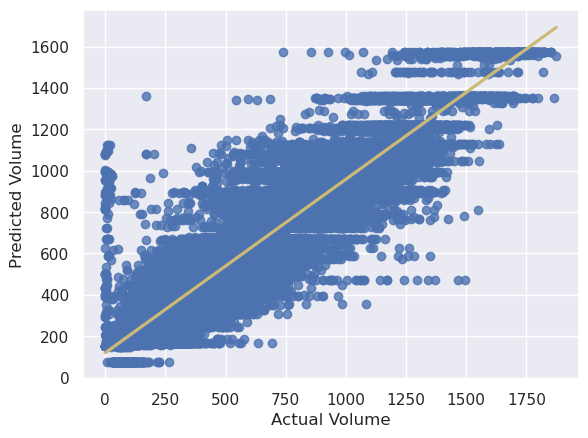

In [6]:
from sklearn.ensemble import RandomForestRegressor

file_name = "133_random_forest"
model_name = "Random Forest"

param_grid = {
    "n_estimators": [100,200,300],
    "max_depth": [16,32,48],
    "max_leaf_nodes": [10,50,100],
    "min_samples_leaf": [1,5,10],
    "min_samples_split": [2,8,16]
}

estimator = RandomForestRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, RandomForestRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## Decision Tree

Testing 750 param combinations for Decision Tree. CV=5. Total fits: 3750

Searching space...
Fitting 5 folds for each of 750 candidates, totalling 3750 fits
Searching space... OK! Took 73.56199264526367 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 0.46137475967407227 seconds

model Decision Tree
r2 0.8398587942479236
mae 114.16780523087239
mse 24742.632027318155
rmse 157.29790852811158
mape 4731841669305497.0
time_to_fit 0.46137475967407227
time_to_predict 0.007894277572631836

Dumping model...
Dumping model... OK! Took 0.004190683364868164 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


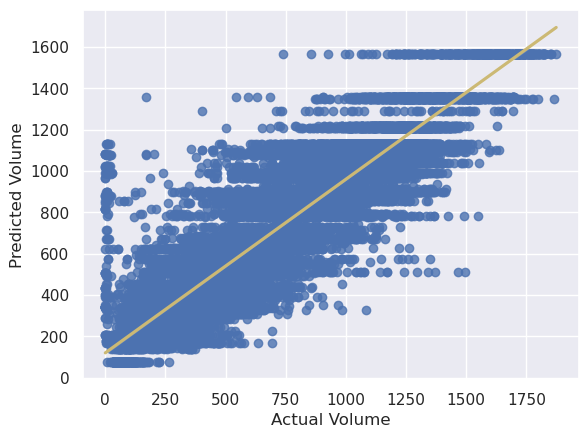

In [7]:
from sklearn.tree import DecisionTreeRegressor

file_name = "133_decision_tree"
model_name = "Decision Tree"

param_grid = {
    "random_state": [42],
    "criterion": ["squared_error"],
    "splitter": ["best"],
    "max_depth": [6,8,16,32,64,128],
    "min_samples_split": [2,4,8,16,32],
    "min_samples_leaf": [1,5,10,15,30],
    "max_leaf_nodes": [10,30,50,75,100]
}

estimator = DecisionTreeRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, DecisionTreeRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## XGBoost

Testing 243 param combinations for XGBoost. CV=5. Total fits: 1215

Searching space...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Searching space... OK! Took 7670.01838850975 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 12.925156116485596 seconds

model XGBoost
r2 0.9667530881224348
mae 49.896413349976
mse 5136.817240559619
rmse 71.67159298187545
mape 2493551001346696.5
time_to_fit 12.925156116485596
time_to_predict 0.0962374210357666

Dumping model...
Dumping model... OK! Took 0.6189999580383301 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


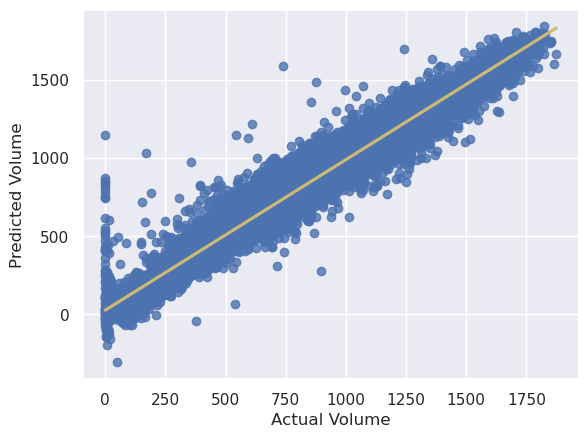

In [8]:
import xgboost as xgb

file_name = "133_xgboost"
model_name = "XGBoost"

param_grid = {
    "random_state": [42],
    "objective": ["reg:squarederror"],
    "tree_method": ["gpu_hist"],
    "predictor": ["gpu_predictor"],
    "num_parallel_tree": [10],
    "max_depth": [6, 8, 16],
    "n_estimators": [100, 250, 350],
    "max_leaves": [20, 40, 80],
    "alpha": [0.01, 0.1, 1],
    "learning_rate": [0.3, 0.5, 0.9]
}

estimator = xgb.XGBRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)
    
model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, xgb.XGBRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## MLP

Testing 216 param combinations for MLP. CV=5. Total fits: 1080

Searching space...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Searching space... OK! Took 7065.582198143005 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 502.6150269508362 seconds

model MLP
r2 0.9334917362962728
mae 69.10306291146932
mse 10275.86552673265
rmse 101.36994390218754
mape 3371223445362426.0
time_to_fit 502.6150269508362
time_to_predict 0.05081796646118164

Dumping model...
Dumping model... OK! Took 0.03359365463256836 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


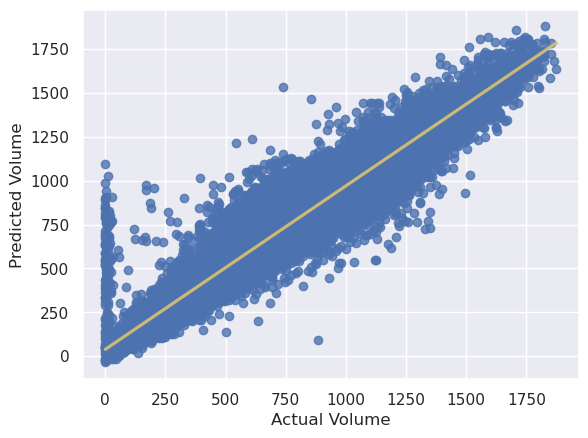

In [9]:
from sklearn.neural_network import MLPRegressor

file_name = "133_mlpr"
model_name = "MLP"

param_grid = {
    "random_state": [42],
    "hidden_layer_sizes": [(100), (100,50), (100,50,25)],
    "alpha": [0.0001, 0.001, 0.1],
    "learning_rate_init": [0.001, 0.1],
    "max_iter": [900, 1000, 1200],
    "tol": [1e-4],
    "epsilon": [1e-8, 1e-4],
    "n_iter_no_change": [3, 10]
}

estimator = MLPRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, MLPRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train